In [4]:
import numpy as np
import matplotlib.pyplot as plt

from planar_code import PlanarCode
from graph_operations import *
from visualization import *
from matching import*

L, W = (8, 8)
p = np.full((L,W,2), 0.05)
p_dual = np.full((L+1,W-1,2), 0.05)
#p=0.05
#p_dual=0.05
planar_code = PlanarCode(L=L, W=W, p=p, p_dual=p_dual, boundaries=np.array([1,1,0,0], dtype=int))
planar_code.advance(1)

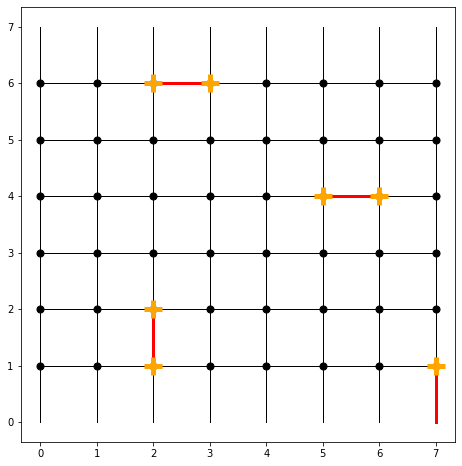

In [5]:
plot_planar_code(planar_code, plot_dual=False, show_errors=True, show_syndrome=True)

In [6]:
lattice = planar_code.primal
syndrome = planar_code.measure_syndrome()[0]
adjacency = syndrome_to_edge_list(lattice, syndrome, force_manhattan=False)
plot_lattice_graph(adjacency, planar_code.primal.shape[0])

matchings = min_weight_matching(lattice, syndrome)
nodes = 0
for pair in matchings:
    for v in pair:
        nodes += int(v is not None)
print(nodes, np.sum(syndrome))
plot_matchings(lattice, syndrome, force_manhattan=False)

KeyError: 65